# Estudio de lugares de observación óptima para el asteroide 99942 Apophis

<center> Agustín Vallejo Villegas </center>  
<br />
<center> Artículo #1
<center> Astrodinámica
<center> Universidad de Antioquia
<center> 2020-1




### Documentación

+ El hpta de Basemap: 
    + https://matplotlib.org/basemap/index.html
    +  https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
+ Horizons Query: 
    + https://astroquery.readthedocs.io/en/latest/jplhorizons/jplhorizons.html
+ Animaciones:
    + https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb#scrollTo=lkmX8eKePPA2
    + https://colab.research.google.com/drive/1Ofuol9wHBJKxZlDS4foZ3cm9G8fArOow#scrollTo=rd6h4K9vOtZk

### Apofis
+ 


### Librerías

In [ ]:
"LIBRERÍAS BÁSICAS"
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
"SPICEYPY"
!pip install spiceypy
import spiceypy as spy

     |████████████████████████████████| 266kB 11.8MB/s 
  Created wheel for spiceypy: filename=spiceypy-3.1.1-cp36-none-any.whl size=1830372 sha256=1df36f701bdd7a92ff3419016e06017d8aad1c5ceb944fb516c945b452ec6480
  Stored in directory: /root/.cache/pip/wheels/10/51/94/fef6537fa8b157ab0830fc773cb20a5d06d5c15e186a1ecb0e
Successfully built spiceypy


In [ ]:
"ASTROPY"
!pip install astroquery
from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

     |████████████████████████████████| 6.5MB 10.1MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 2.6MB 56.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=630c89c9ce0ec925e835faf8505690c0a385554d337972e1af9f8106f9dea90f
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [ ]:
"MAPITAS"
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,433 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-

     |████████████████████████████████| 2.8MB 11.4MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702093 sha256=1b383271a6cb8b77c8326ef754d521b0ee81671295f44a544ce04f1fe9eb3959
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.0.post1
    Uninstalling pyproj-3.0.0.post1:
      Successfully uninstalled pyproj-3.0.0.post1


In [ ]:
"TQDM"
!pip install tqdm
from tqdm import tqdm

### Efemérides

In [ ]:
"UNIDAD ASTRONÓMICA"
AU = (1*u.au).to(u.m).value

"TIEMPOS"
# Se definen los tiempos desde que está a 12Rt, pasando por su máximo
# acercamiento en 6Rt y volviendo a 12Rt
t_ini = Time('2029-04-13 19:00:00',format='iso')
t_max = Time('2029-04-13 22:05:00',format='iso') #Máximo Acercamiento
# t_end = Time('2029-04-13 23:00:00',format='iso') #Final. Step de 5min
t_end = Time('2029-04-14 06:00:00',format='iso')

timesyy = {'start':t_ini.value, 'stop':t_end.value, 'step':'20m'}


print("(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)")

(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)


In [ ]:
"EFEMÉRIDES"
#Efemérides de Apofis entre los tiempos estipulados
apophis = Horizons(id='99942',epochs=timesyy) 
ephemeris = apophis.ephemerides()
vectors = apophis.vectors()

#Coordenadas Ecuatoriales del Asteroide
ECUcoords = SkyCoord(ephemeris['RA'],ephemeris['DEC']
                     ,ephemeris['delta'],frame='gcrs')

Nt = np.shape(ephemeris)[0]
print(Nt)

34


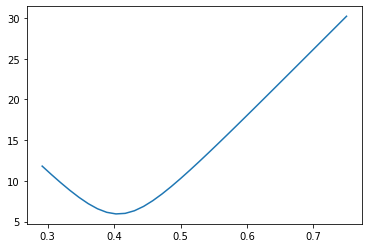

In [ ]:
# ephemeris.to_pandas()
plt.plot(ephemeris.to_pandas()['datetime_jd']-2.462240e+06,ephemeris.to_pandas()['delta']*23500)

### Coloreando el Mapita

In [ ]:
def get_h(T,Lon,Lat,RA,Dec,r):
  """
  Teniendo las coordenadas ecuatoriales y la ubicación de un observador,
  se saca el ángulo de elevación.
  """
  G = T.sidereal_time('apparent', 'greenwich').to(u.deg)
  LonR = Lon*u.deg + G

  #Vector Posición Objeto
  Rx = r*np.cos(Dec*u.deg)*np.cos(RA*u.deg)
  Ry = r*np.cos(Dec*u.deg)*np.sin(RA*u.deg)
  Rz = r*np.sin(Dec*u.deg)
  R = np.array([Rx,Ry,Rz])

  #Vector Posición Observador
  RLx = np.cos(Lat*u.deg)*np.cos(LonR)
  RLy = np.cos(Lat*u.deg)*np.sin(LonR)
  RLz = np.sin(Lat*u.deg)
  RL = np.array([RLx,RLy,RLz])

  #Resta de Vectores y Producto Escalar Inverso
  R2 = R-RL
  H = np.rad2deg(np.arccos(np.dot(RL,R2)/(np.linalg.norm(RL)*np.linalg.norm(R2))))
  H = 90 - H
  return H

In [ ]:
"SACO LA ALTURA DEL ASTEROIDE EN TODAS LAS UBICACIONES (SE DEMORA COMO 2 MINUTOS)"
nlon = 64
nlat = 36
Lons = np.linspace(-180,180,nlon)
Lats = np.linspace(-90,90,nlat)

#Creo el Grid de Latitudes, Longitudes y fechas
Alts = np.zeros((nlon,nlat,Nt))

#Este siempre se demora ratico
for t in tqdm(range(Nt)):
  TIME = Time(ephemeris['datetime_jd'][t],format='jd')
  RA = ephemeris['RA'][t]
  DEC = ephemeris['DEC'][t]
  DELTA = ephemeris['delta'][t]*u.au.to(u.earthRad)
  for i in range(nlon):
    for j in range(nlat):
      LON = Lons[i]
      LAT = Lats[j]
      Alts[i,j,t] = get_h(TIME,LON,LAT,RA,DEC,DELTA)

100%|██████████| 34/34 [01:51<00:00,  3.27s/it]


Text(0.5, 1.0, 'Alturas de Apophis en 2029-Apr-13 19:00')

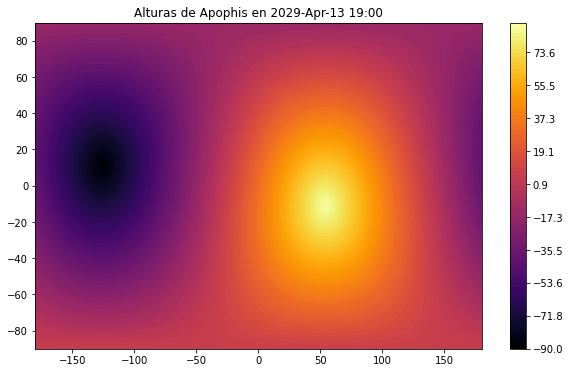

In [ ]:
plt.figure(figsize=(10,6))
plt.contourf(Lons,Lats,Alts[:,:,0].T,levels=np.linspace(-90,90,100),cmap='inferno')
plt.colorbar()
plt.title("Alturas de Apophis en "+str(ephemeris['datetime_str'][0]))

In [ ]:
def filterNeg(arr):
  """
  Recibe un array en 3D y le quita los valores negativos
  """
  a,b,c = np.shape(arr)
  arr1 = np.reshape(arr,a*b*c)
  arr1[np.where(arr1 < 0)] = 0

  return np.reshape(arr1,(a,b,c))/90

Text(0.5, 1.0, 'Alturas Positivas de Apophis en 2029-Apr-13 19:00')

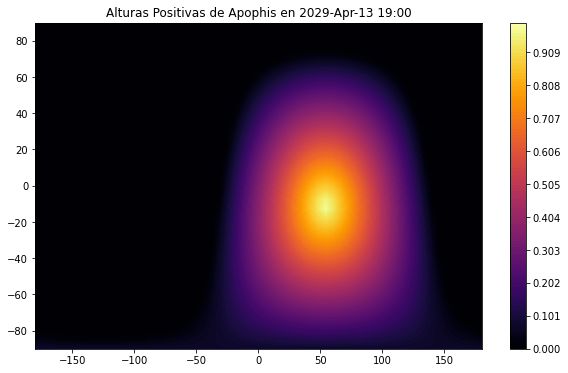

In [ ]:
AltsPos = filterNeg(Alts)

plt.figure(figsize=(10,6))
plt.contourf(Lons,Lats,AltsPos[:,:,0].T,levels=np.linspace(0,1,100),cmap='inferno')
plt.colorbar()
plt.title("Alturas Positivas de Apophis en "+str(ephemeris['datetime_str'][0]))


In [ ]:
"ALTURAS DEL SOL (TAMBIÉN SE DEMORA COMO 2 MINUTOS)"
AltsSun = np.zeros((nlon,nlat,Nt))
FilterSun = np.zeros((nlon,nlat,Nt))

#Defino una función de caída para filtrar con la altura del Sol
def sigmoid(x):
  return 1 / (1 + np.exp(0.5*(x+10)))

for t in tqdm(range(Nt)):
  TIME = Time(ephemeris['datetime_jd'][t],format='jd')
  SUN = get_sun(TIME)
  Sun_RA = SUN.ra.value
  Sun_DEC = SUN.dec.value
  Sun_DIST = 1*u.au.to(u.earthRad)
  for i in range(nlon):
    for j in range(nlat):
      LON = Lons[i]
      LAT = Lats[j]

      Sun_H = get_h(TIME,LON,LAT,
                             Sun_RA,Sun_DEC,Sun_DIST)
      AltsSun[i,j,t] = Sun_H
      FilterSun[i,j,t] = sigmoid(Sun_H)

100%|██████████| 34/34 [01:45<00:00,  3.11s/it]


Text(0.5, 1.0, 'Alturas del Sol en 2029-Apr-13 19:00')

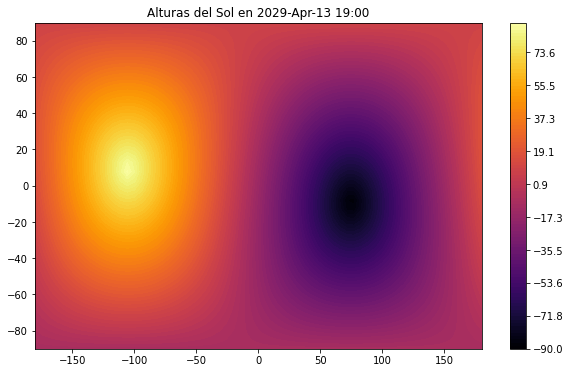

In [ ]:
plt.figure(figsize=(10,6))
plt.contourf(Lons,Lats,AltsSun[:,:,0].T,levels=np.linspace(-90,90,100),cmap='inferno')
plt.colorbar()
plt.title("Alturas del Sol en "+str(ephemeris['datetime_str'][0]))

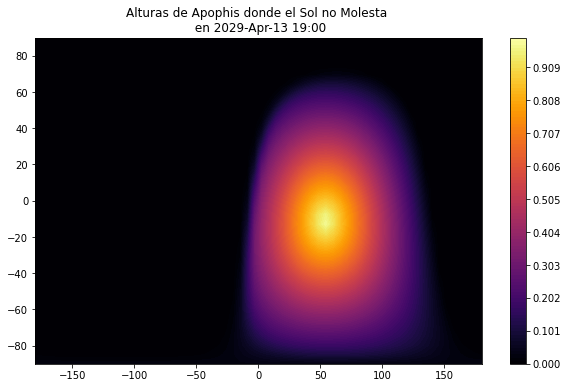

In [ ]:
AltsPosSun = AltsPos * FilterSun

plt.figure(figsize=(10,6))
plt.contourf(Lons,Lats,AltsPosSun[:,:,0].T,levels=np.linspace(0,1,100),cmap='inferno')
plt.colorbar()
plt.title("Alturas de Apophis donde el Sol no Molesta \n en "+str(ephemeris['datetime_str'][0]))
plt.show()

### Plot

In [ ]:
ephemeris.to_pandas().columns

Index(['targetname', 'datetime_str', 'datetime_jd', 'H', 'G', 'solar_presence',
       'flags', 'RA', 'DEC', 'RA_app', 'DEC_app', 'RA_rate', 'DEC_rate', 'AZ',
       'EL', 'AZ_rate', 'EL_rate', 'sat_X', 'sat_Y', 'sat_PANG',
       'siderealtime', 'airmass', 'magextinct', 'V', 'surfbright',
       'illumination', 'illum_defect', 'sat_sep', 'sat_vis', 'ang_width',
       'PDObsLon', 'PDObsLat', 'PDSunLon', 'PDSunLat', 'SubSol_ang',
       'SubSol_dist', 'NPole_ang', 'NPole_dist', 'EclLon', 'EclLat', 'r',
       'r_rate', 'delta', 'delta_rate', 'lighttime', 'vel_sun', 'vel_obs',
       'elong', 'elongFlag', 'alpha', 'lunar_elong', 'lunar_illum',
       'sat_alpha', 'sunTargetPA', 'velocityPA', 'OrbPlaneAng',
       'constellation', 'TDB-UT', 'ObsEclLon', 'ObsEclLat', 'NPole_RA',
       'NPole_DEC', 'GlxLon', 'GlxLat', 'solartime', 'earth_lighttime',
       'RA_3sigma', 'DEC_3sigma', 'SMAA_3sigma', 'SMIA_3sigma', 'Theta_3sigma',
       'Area_3sigma', 'RSS_3sigma', 'r_3sigma', 'r_rate_3sigm

In [ ]:
def get_lon(TIME,RA):
  """
  Saca la Longitud que estará bajo el asteroide en cada momento
  """
  T = Time(TIME,format='jd')
  G = T.sidereal_time('apparent', 'greenwich').to(u.deg)
  return RA - G.value

maxlons = get_lon(ephemeris['datetime_jd'],ephemeris['RA'])
maxlats = ephemeris['DEC']

for i in range(len(maxlons)):
  if maxlons[i] < -180: maxlons[i] += 360

# for i in range(1,len(maxlons)):
#   if maxlons[i] > maxlons[i-1]:

i = -15
maxlons[i] = np.nan
maxlons = np.array(np.insert(maxlons,i+1,[179]))
maxlats = np.array(np.insert(maxlats,i+1,[maxlats[i-1]]))

In [ ]:
maxlons[-20:],maxlats[-20:]

(array([-151.820979  , -161.63320826, -170.52337753, -178.71476679,
                  nan,  179.        ,  166.389645  ,  159.47799573,
         152.82862646,  146.39171718,  140.1290079 ,  134.01072862,
         128.01342934,  122.11838006,  116.31052078,  110.57756183,
         104.90941254,   99.29768325,   93.73540396,   88.21667466]),
 array([36.23366, 34.96099, 33.76112, 32.65895,      nan, 32.65895,
        30.75613, 29.94222, 29.20775, 28.54357, 27.94132, 27.39355,
        26.89374, 26.43627, 26.01623, 25.62941, 25.27216, 24.94132,
        24.63413, 24.3482 ]))

In [ ]:
ephemeris['datetime_str'][-12] #Paso Máximo AQUI

'2029-Apr-14 02:20'

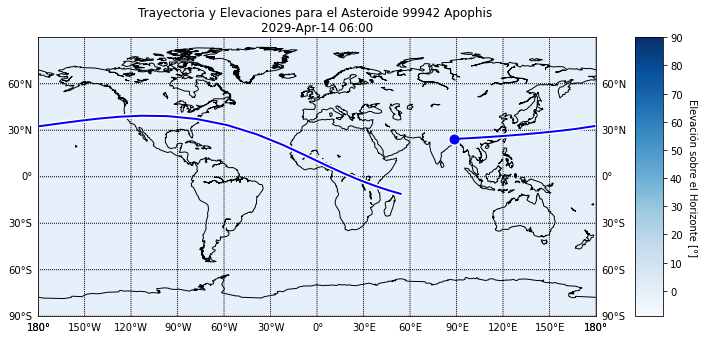

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

t = -1
fig=plt.figure(figsize=(10,8))
ax = plt.axes()
ax.clear()
plot = ax.contourf(Lons,Lats,AltsPosSun[:,:,t].T*90,levels=np.linspace(-0.1,1,100)*90,cmap='Blues')
m = Basemap(ax=ax,projection='cyl', lon_0 = 0, lat_0 = 0)
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title("Trayectoria y Elevaciones para el Asteroide 99942 Apophis \n"+str(ephemeris['datetime_str'][t]))


ax.plot(maxlons,maxlats,'w-',lw=5)
ax.plot(maxlons[t],maxlats[t],'wo',ms=12)

ax.plot(maxlons,maxlats,'b-',lw=2)
ax.plot(maxlons[t],maxlats[t],'bo',ms=9)


axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.07, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

cbar = fig.colorbar(plot, cax=axins)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Elevación sobre el Horizonte [°]', rotation=270)
plt.show()

In [ ]:
def frame(t):
    ax.clear()
    plot = ax.contourf(Lons,Lats,AltsPosSun[:,:,t].T*90,levels=np.linspace(-0.1,1,100)*90,cmap='Blues')
    m = Basemap(ax=ax,projection='cyl', lon_0 = 0, lat_0 = 0)
    m.drawcoastlines()
    m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,1])
    m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
    ax.set_title("Mapa de Contorno de Elevaciones y Trayectoria para el Asteroide 99942 Apophis \n"+str(ephemeris['datetime_str'][t]))

    ax.plot(maxlons,maxlats,'w-',lw=5)
    ax.plot(maxlons[t],maxlats[t],'wo',ms=12)

    ax.plot(maxlons,maxlats,'b-',lw=2)
    ax.plot(maxlons[t],maxlats[t],'bo',ms=9)


    axins = inset_axes(ax,
                      width="5%",  # width = 5% of parent_bbox width
                      height="100%",  # height : 50%
                      loc='lower left',
                      bbox_to_anchor=(1.07, 0., 1, 1),
                      bbox_transform=ax.transAxes,
                      borderpad=0,
                      )

    cbar = fig.colorbar(plot, cax=axins)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Elevación sobre el Horizonte [°]', rotation=270)
    return plot

### Animación

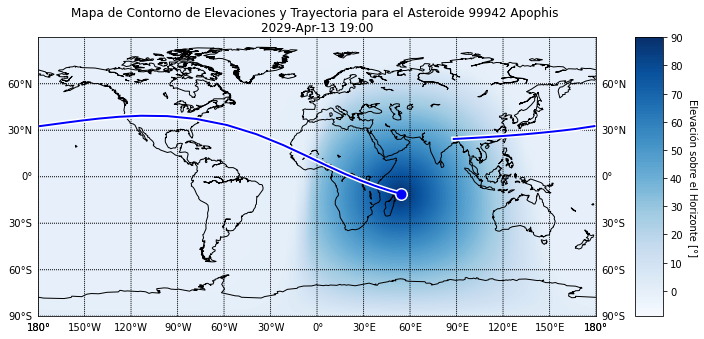

In [ ]:
fig=plt.figure(figsize=(10,8))
ax = plt.axes()

anim = animation.FuncAnimation(fig, frame, frames=Nt, blit=False, repeat=True)

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Agustín-Vallejo'), bitrate=1800)
anim.save("Apophis3.mp4",writer=writer)

from google.colab import files
files.download("Apophis3.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
anim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### FAST

In [ ]:
"UNIDAD ASTRONÓMICA"
AU = (1*u.au).to(u.m).value

"TIEMPOS"
# Se definen los tiempos desde que está a 12Rt, pasando por su máximo
# acercamiento en 6Rt y volviendo a 12Rt
t_ini = Time('2029-04-13 19:00:00',format='iso')
t_max = Time('2029-04-13 22:05:00',format='iso') #Máximo Acercamiento
t_end = Time('2029-04-14 12:00:00',format='iso')
timesyy = {'start':t_ini.value, 'stop':t_end.value, 'step':'15m'}


print("(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)")

(Ignorar advertencia de ERFA si sale, es porque está muy a futuro)


In [ ]:
"EFEMÉRIDES"
#Efemérides de Apofis entre los tiempos estipulados
arecibo = { 'lon': 293.24692,
            'lat': 0.949577,
            'elevation': +0.312734}

fast   = { 'lon': 106.85667,
            'lat': 25.653055,
            'elevation': +0.312734}
apophis = Horizons(id='99942',location=fast,epochs=timesyy) 
ephemeris = apophis.ephemerides()
apophis.vectors()

In [ ]:
ephemeris.to_pandas().columns

Index(['targetname', 'datetime_str', 'datetime_jd', 'H', 'G', 'solar_presence',
       'flags', 'RA', 'DEC', 'RA_app', 'DEC_app', 'RA_rate', 'DEC_rate', 'AZ',
       'EL', 'AZ_rate', 'EL_rate', 'sat_X', 'sat_Y', 'sat_PANG',
       'siderealtime', 'airmass', 'magextinct', 'V', 'surfbright',
       'illumination', 'illum_defect', 'sat_sep', 'sat_vis', 'ang_width',
       'PDObsLon', 'PDObsLat', 'PDSunLon', 'PDSunLat', 'SubSol_ang',
       'SubSol_dist', 'NPole_ang', 'NPole_dist', 'EclLon', 'EclLat', 'r',
       'r_rate', 'delta', 'delta_rate', 'lighttime', 'vel_sun', 'vel_obs',
       'elong', 'elongFlag', 'alpha', 'lunar_elong', 'lunar_illum',
       'sat_alpha', 'sunTargetPA', 'velocityPA', 'OrbPlaneAng',
       'constellation', 'TDB-UT', 'ObsEclLon', 'ObsEclLat', 'NPole_RA',
       'NPole_DEC', 'GlxLon', 'GlxLat', 'solartime', 'earth_lighttime',
       'RA_3sigma', 'DEC_3sigma', 'SMAA_3sigma', 'SMIA_3sigma', 'Theta_3sigma',
       'Area_3sigma', 'RSS_3sigma', 'r_3sigma', 'r_rate_3sigm

In [ ]:
ephemeris['horas'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])

In [ ]:
H1 = ephemeris['horas'][np.where(ephemeris['EL'] >= 50)][0]
H2 = ephemeris['horas'][np.where(ephemeris['EL'] >= 50)][-1]
print(H1,H2)

7.749999985098839 12.49999999254942


In [ ]:
ephemeris[['datetime_str','RA','DEC','EL']][np.where(ephemeris['EL'] >= 49)].to_pandas()

datetime_str        RA       DEC         EL
0   2029-Apr-14 02:30  31.93984  28.66451  49.708346
1   2029-Apr-14 02:45  30.61484  28.25000  54.108386
2   2029-Apr-14 03:00  29.40116  27.85451  58.447295
3   2029-Apr-14 03:15  28.28617  27.47722  62.730263
4   2029-Apr-14 03:30  27.25914  27.11721  66.961798
5   2029-Apr-14 03:45  26.31091  26.77352  71.145817
6   2029-Apr-14 04:00  25.43359  26.44523  75.285713
7   2029-Apr-14 04:15  24.62040  26.13143  79.384396
8   2029-Apr-14 04:30  23.86545  25.83126  83.444257
9   2029-Apr-14 04:45  23.16361  25.54391  87.466149
10  2029-Apr-14 05:00  22.51039  25.26864  88.534239
11  2029-Apr-14 05:15  21.90182  25.00474  84.581698
12  2029-Apr-14 05:30  21.33441  24.75159  80.656515
13  2029-Apr-14 05:45  20.80505  24.50859  76.760875
14  2029-Apr-14 06:00  20.31096  24.27519  72.894006
15  2029-Apr-14 06:15  19.84964  24.05091  69.055091
16  2029-Apr-14 06:30  19.41885  23.83529  65.243420
17  2029-Apr-14 06:45  19.01656  23.62790  61.458418
18  2029-Apr-14 07:00  18.64092  23.42837  57.699636
19  2029-Apr-14 07:15  18.29023  23.23634  53.966760
20  2029-Apr-14 07:30  17.96295  23.05148  50.259602

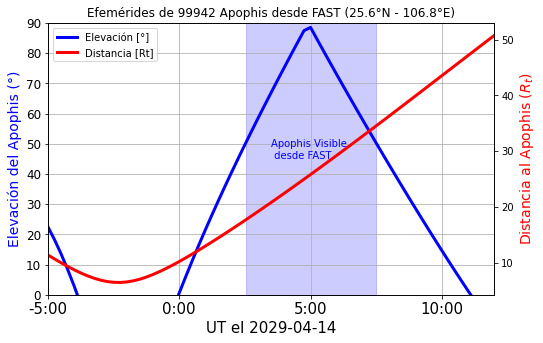

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))

ax.set_title("Efemérides de 99942 Apophis desde FAST (25.6°N - 106.8°E)")
ax.plot(ephemeris['horas'],ephemeris['EL'],label='Elevación [°]',lw=3,color='b')
# plt.plot(ephemeris.to_pandas()['horas'],ephemeris.to_pandas()['DEC'],label='Declinación [°]',lw=3)
# plt.plot(ephemeris.to_pandas()['horas'],ephemeris.to_pandas()['elong'],label='Elongación [°]',lw=3)

ax.fill_between([H1-0.2,H2],0,100,alpha=0.2,color='b')
ax.text(8.5,45,"Apophis Visible \n desde FAST",color='b')
# ax.hlines(50,-10,50,'b',linestyles='--')

ax.set_ylabel("Elevación del Apophis (°)",color='b',size=14)

plt.xlabel("UT el 2029-04-14",size=15)
plt.xticks([0,5,10,15],['-5:00','0:00','5:00','10:00'],size=15)
plt.yticks(size=12)
plt.ylim([0,90])
plt.xlim([0,ephemeris['horas'][-1]])
ax.grid()

ax2=ax.twinx()
ax2.plot(ephemeris['horas'],ephemeris['delta']*23500,label='Distancia [Rt]',lw=3,color='r')
ax.plot(ephemeris['horas'],ephemeris['delta']*0-1,label='Distancia [Rt]',lw=3,color='r')

ax2.set_ylabel("Distancia al Apophis ($R_t$)",color='r',size=14)


ax.legend(loc=2)
plt.show()